## Machine Learning - Ex.7


Submitted by: [Osnat Haj Yahia]

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal # *** NEW !! ***
import random

### 1-D Gaussian example


Recall the univariate normal (Gaussian) distribution:

$$ f(x)=\mathcal{N}(x\ |\ \mu,\sigma^2)=\frac{1}{\sqrt{(2\pi\sigma^2)}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2} \right]$$


We will use: **```scipy.stats.multivariate_normal```**,  to generate the random variable, sample data from it and calculate its distribution (its probability density function):



sample = 
 [ 3.51518752  2.51257074  1.75427951  2.39022684  2.79917218  1.41601949
  2.23526012  2.16479483  0.70350872  3.72221578  1.95817775  2.13600151
  1.87397446  3.91278109  2.92158619  3.37602679  1.74308713  2.9859302
  2.48262041  1.96561455  2.1208456   2.91121541  3.28670711  2.06796638
  2.14598972  3.1484568   3.40600928  1.49315044  2.93882482  1.94145307]


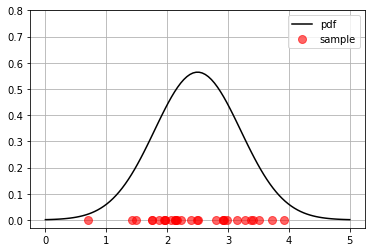

In [2]:
# first, define a normal random variable (rv):
rv = multivariate_normal(mean=2.5, cov=0.5)  

# then we can use it to generate n=30 random samples:
x = rv.rvs(30)
print('sample = \n',x)

#  we can also use it to calculate the probability density function (pdf):
xx = np.linspace(0,5,100)
yy = rv.pdf(xx)

plt.plot(xx, yy,'-k') # plot the pdf
plt.plot(x,np.zeros_like(x),'or',markersize=8,alpha=0.6)
plt.ylim([-0.03,0.8])
plt.legend(['pdf','sample'])
plt.grid()

### 2-D Gaussian example


Recall the multivariate normal (Gaussian) distribution:

$$ f(x)=\mathcal{N}(x\ |\ \mu,\Sigma)=\frac{1}{\sqrt{(2\pi)^d \det\Sigma}}\exp\left[-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) \right] $$


where $x$ and $\mu$ are $(d\times 1)$ vectors, and $\Sigma$ is a $(d\times d)$ matrix.

Again, we will use: **```scipy.stats.multivariate_normal```**,  to generate the random variable, sample data from it and calculate its distribution (its probability density function):

[]

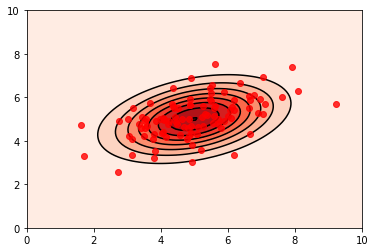

In [3]:
# your code here..

# define a normal random variable (rv):
rv2 = multivariate_normal(mean=[5,5], cov=[[2.0, 0.5], [0.5, 1]])

# use it to generate n=100 random samples:
x = rv2.rvs(100)

#   calculate the probability density function (pdf) over the 2D grid:
xx = np.linspace(0,10,100)
X1,X2 = np.meshgrid(xx,xx)
X1X2 = np.stack((X1,X2),axis=-1)
yy = rv2.pdf(X1X2)

# plot a contour map of the 2D pdf:
plt.contourf(X1, X2, yy,10,cmap=plt.cm.Reds) 
plt.contour(X1, X2, yy,10,colors='k') 


# plot the sampled points:
plt.plot(x[:,0],x[:,1],'or',alpha=0.8)
plt.plot()

### warm-up: fitting a Gaussian distribution

Load the dataset: ```ex7_data1.csv``` and display the data points.

Use the MLE (maximum likelihood estimator) presented in class (for $\mu$ and $\Sigma$) to fit a Gaussian distribution to the data.

Plot the contour map of the estimated distribution, together with the data points.

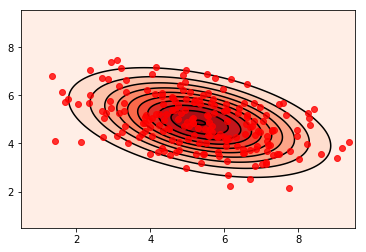

In [14]:
# your code here..

def GausPlot(X):
    n, d = X.shape
    means = np.zeros((d,))

    for j in range(n):
        means = (j * means + X[j, :]) / (j + 1)
    sig = np.dot((X - means).transpose(), X - means) / n
             
    rv1 = multivariate_normal(mean=means, cov=sig)

    # generated n=100 random samples:
    x = rv1.rvs(100)

    #calculate pdf over the 2D grid:
    xx = np.linspace(np.min(x) - 1, np.max(x) + 1 ,1000)
    X1,X2 = np.meshgrid(xx,xx)
    X1X2 = np.stack((X1,X2),axis=-1)
    yy = rv1.pdf(X1X2)

    # the contour map of the 2D pdf:
    plt.contourf(X1, X2, yy,10,cmap=plt.cm.Reds) 
    plt.contour(X1, X2, yy,10,colors='k') 


    #the plot of the sampled points:
    plt.plot(X[:,0],X[:,1],'or',alpha=0.8)
    plt.plot()
    
X = np.loadtxt('ex7_data1.csv', delimiter=',')
GausPlot(X)

### Gaussian Mixture Model (GMM)


Load the dataset: ```ex7_data2.csv``` and display the data points.


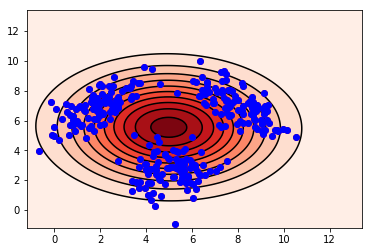

In [15]:
# your code here.. 
X = np.loadtxt('ex7_data2.csv', delimiter=',')
GausPlot(X)
plt.plot(X[:, 0], X[:, 1], 'ob')

Clearly, a single Gaussian is not a good fit for this data. 

We will implement the E-M algorithm to fit a mixture of Gaussians to the data.

To this aim, implement the following functions:

1. ```E_step``` function that takes the GMM parameters $\{(w_c,\mu_c,\Sigma_c)\}_{c=1}^k$ and the data, and returns all the assignments $r_{i,j}\ \ (i=1,..,n\ ,\ j=1,..,k)$

2. ```M_step``` function that takes the data and the assignments matrix $r$, and re-estimate the GMM parameters.

3. ```log_likelihood``` function that calculates the log-likelihood of the GMM parameters given the data.

Finally, implement the ```GMM_EM``` algorithm and use it to fit a mixture of k=3 Gaussians to the data. Run it several times until you get a satisfying result.

- Plot a graph showing the convergence of the log-likelihood.

- Plot together a contour map for each of the Gaussians, and the original data points. 

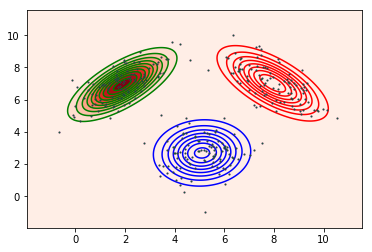

In [16]:
# your code here.. 
def nfunc(x, mean, cov):
    temp = np.dot((x - mean).transpose(), np.linalg.inv(cov))
    temp1 = np.dot(temp, x - mean)
    return (1 / np.sqrt(2 * np.pi * np.linalg.det(cov))) * np.exp(-0.5 * temp1)


def Estep(X, wc, meanc, covc):
    n, d = X.shape
    k = wc.shape[0]
    r = np.zeros((n, k))
    
    for i in range(n):
        for j in range(k):
            r[i, j] = wc[j] * nfunc(X[i, :], meanc[j, :], covc[j, :, :])
        r[i, :] = r[i, :] / np.sum(r[i, :])
        
    return r


def Mstep(X, r):
    
    n, d = X.shape
    k = r.shape[1]
    nj = np.reshape(np.sum(r, axis = 0), (k, 1))
    wc = nj / n
    meanc = np.zeros((k, d))
    for i in range(n):
        meanc += np.dot(np.reshape(r[i, :], (k, 1)), np.reshape(X[i, :], (2, 1)).transpose())
    meanc /= nj   
    covc = np.zeros((k, d, d))
    
    for j in range(k):
        temp = np.dot(np.reshape(r[:, j], (n, 1)), np.reshape(np.array([1 for i in range(d)]), (1, d)))
        covc[j, :, :] = np.dot((temp * (X - meanc[j, :])).transpose(), temp * (X - meanc[j, :]))
        covc[j, :, :] /= nj[j]
    
    return meanc, covc, wc


def initGmm(X, k):
    
    n, d = X.shape
    
    wc = np.array([1.0 / k for i in range(k)])
   
    meansInx = random.sample(set(range(n)), k)
    means = X[meansInx, :]
    
    cov = np.zeros((k, d, d))
    for j in range(k):
        cov[j, :, :] = np.dot((X - means[j]).transpose(), X - means[j])
    cov /= n

    return means, cov, wc


def logLikelihood(X, meanc, covc, wc):
    n, d = X.shape
    k = meanc.shape[0]
    logL = 0.
    
    for i in range(n):
        N = [nfunc(X[i], meanc[j, :], covc[j, :, :]) for j in range(k)]
        logL += np.log(np.dot(N, wc))
        
    return logL


def gmmItaration(X, k, diff = 1):
    
    n, d = X.shape
    
    meanc, covc, wc = initGmm(X, k)
    logL = logLikelihood(X, meanc, covc, wc)
    lastLogL = logL - diff - 1
    r = np.zeros((n, k))
    while (np.abs(logL - lastLogL) > diff):
        lastLogL = logL
        r = Estep(X, wc, meanc, covc)
        meanc, covc, wc = Mstep(X, r)
        logL = logLikelihood(X, meanc, covc, wc)
        
    return r, meanc, covc, logL


def theGmm(X, k, N = 10, diff = 1):
    
    maxr, maxm, maxc, maxLogL = gmmItaration(X, k, diff)
    for i in range(N - 1):
        r, m, c, logL = gmmItaration(X, k, diff)
        if maxLogL < logL:
            maxr, maxm, maxc, maxLogL = r, m, c, logL
    
    return maxr, maxm, maxc, maxLogL


def gmmPlot(X, m, c):
    n, d = X.shape
    k = m.shape[0]
    
    color = ['r', 'b', 'g', 'y']
    color2 = ['ro', 'bo', 'go', 'yo']
    xx = np.linspace(np.min(X) - 1, np.max(X) + 1 ,1000)
    X1,X2 = np.meshgrid(xx,xx)
    X1X2 = np.stack((X1,X2),axis=-1)
    for i in range(k):
        rv3 = multivariate_normal(mean=m[i, :], cov=c[i, :, :])
        yy = rv3.pdf(X1X2)
        plt.contourf(X1, X2, yy,10,cmap=plt.cm.Reds) 
        plt.contour(X1, X2, yy,10,colors=color[i]) 

        plt.plot(X[:,0],X[:,1],color2[i] ,alpha=0.5, markersize = 1)
        plt.plot()

r, m, c, logl = theGmm(X, 3)
gmmPlot(X, m, c)

Load the last dataset: ```ex7_data3.csv``` and display the data points.

Fit GMMs with K=1, K=2, K=3 and K=4 to the data, and present each of the results.


In [ ]:
# your code here.. 
X = np.loadtxt('ex7_data3.csv', delimiter=',')
for k in range(1, 6):
    r, m, c, logl = theGmm(X, k)
    plt.figure(k)
    gmmPlot(X, m, c)

## Good luck !